<a href="https://colab.research.google.com/github/Rocking-Priya/2025-spring-B2/blob/main/OMDS_Mod2_Week9_Deshpande_Priyanka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

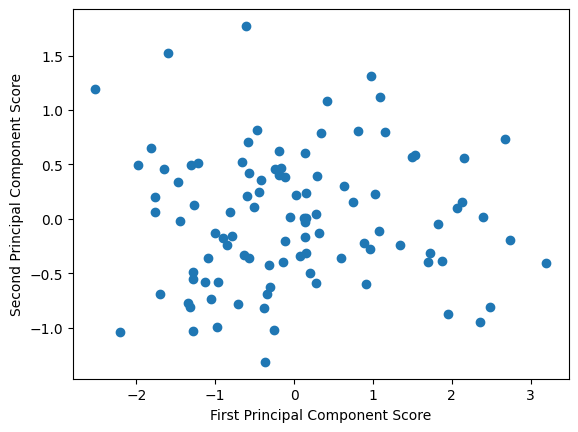

In [2]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

Report:

1. The Outliers in the PCA Plot:

In the PCA scatter plot, there are three outliers in the upper left corner. These points have a low first principal component score since they are far to the left on the x-axis and also have a high second principal component score since they are far up on the y-axis.

2. Why It's Hard to Interpret series_1 vs. series_2:

Series_1 and series_2 are highly correlated. series_2 is just series_1 with small noise. That makes it hard for PCA to separate them cleanly. PCA tends to combine their effects into one direction. Therefore, it's almost impossible to say which of the two series_1 or series_2 is larger for a specific point, based only on the PCA plot.

3. Pair plot shows a strong linear relationship between series_1 and series_2 and a wider spread between series_1 and series_3, which supports the idea that series_3 contributes more to the variance.

4. Advantages and Disadvantages of the PCA Scatter Plot:

Advantages:

It reduces complex 3D data into 2D, making it easy to visualize.

Outliers and clusters can be spotted quickly.

Highlights directions of maximum variance in the data.

Disadvantages:

It's difficult to interpret original variable values from the component scores.

When features are highly correlated like series_1 and series_2, PCA blends them, so we lose clarity on individual effects.

Some information is lost when reducing to two dimensions.

5. Conclusion:

The PCA scatter plot helps identify unusual patterns like outliers, and it shows that most of the data varies along the direction influenced by series_3. However, further visualizations like pairplots are helpful to understand the relationship between individual features. PCA is useful for simplifying complex data, but interpretation of individual variables becomes more abstract.





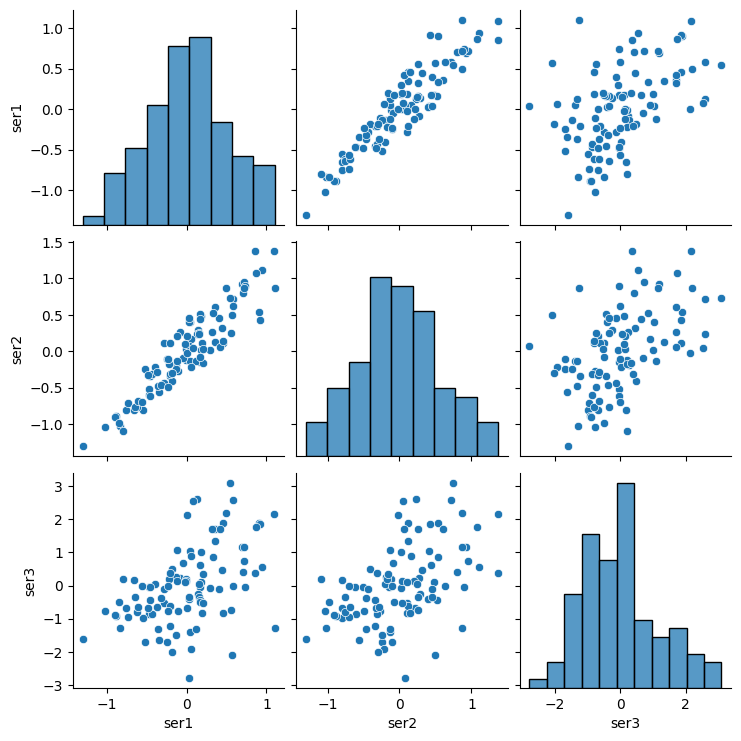

In [ ]:
import seaborn as sns
sns.pairplot(df)
plt.show()


# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [ ]:
df_1 = pd.read_csv('/content/dataset_phishing.csv')
df_1.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


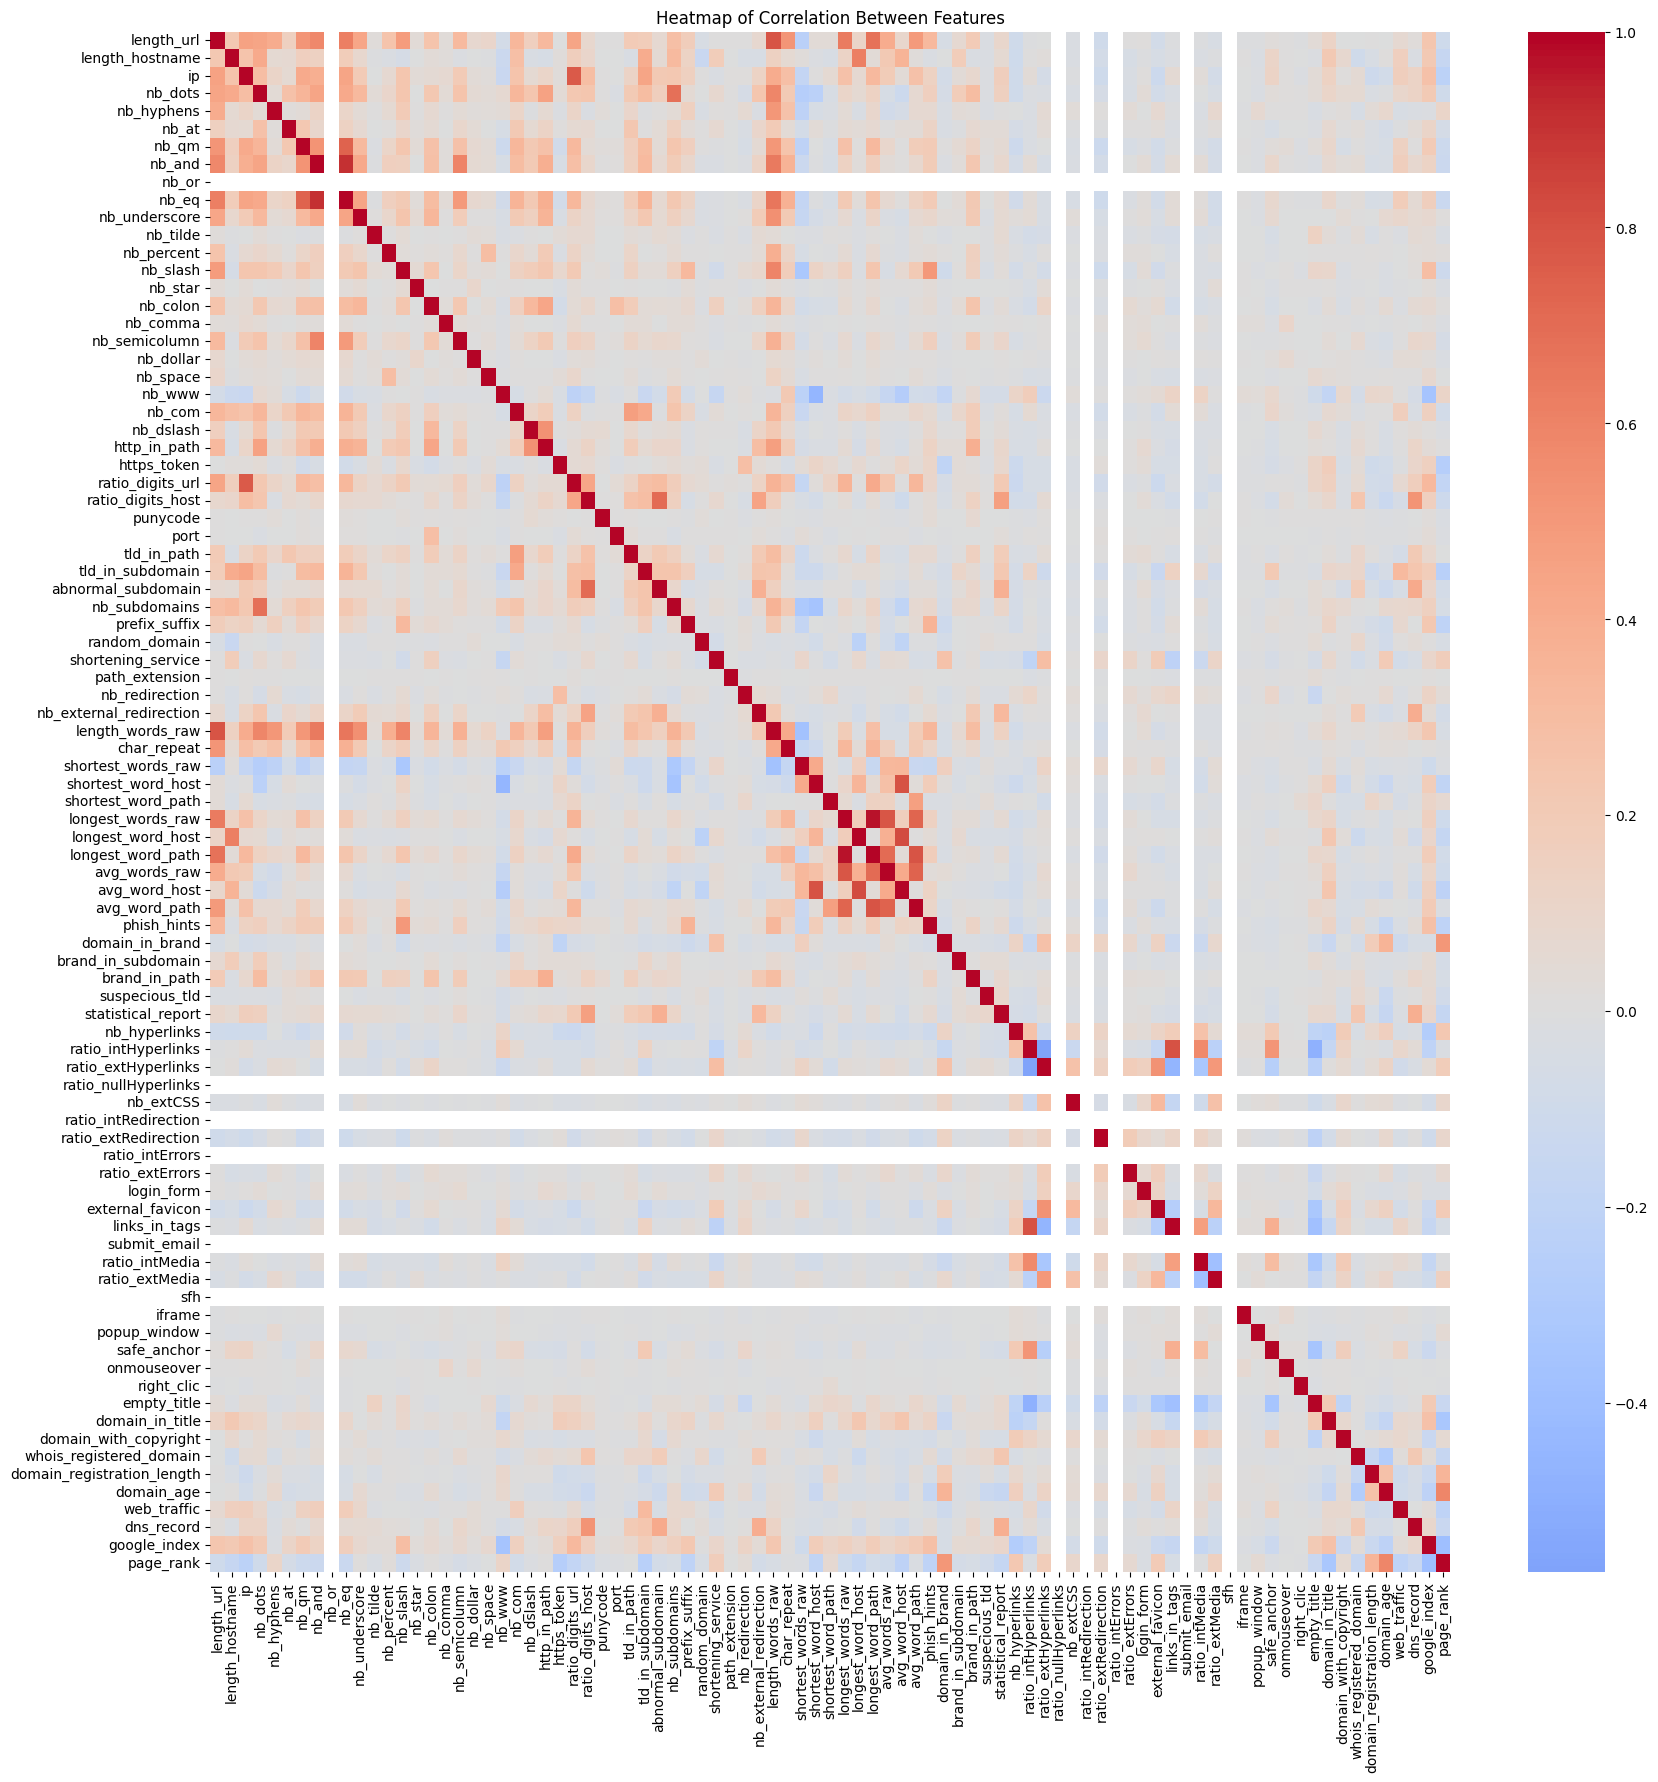

In [ ]:
# Heatmap

plt.figure(figsize=(20, 20))
sns.heatmap(df_1.corr(numeric_only=True), cmap="coolwarm", center=0, annot=False)
plt.title("Heatmap of Correlation Between Features")
plt.show()

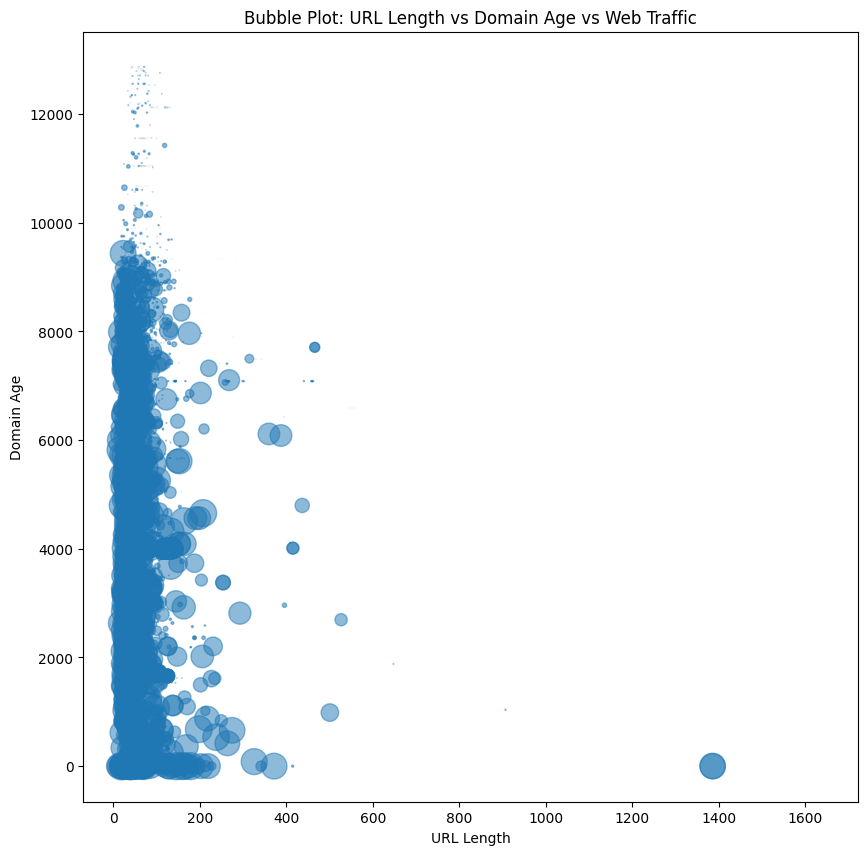

In [ ]:
# Bubble Plot

plt.figure(figsize=(10, 10))
plt.scatter(df_1['length_url'], df_1['domain_age'],
            s=df_1['web_traffic']/28000,
            alpha=0.5)
plt.xlabel('URL Length')
plt.ylabel('Domain Age')
plt.title('Bubble Plot: URL Length vs Domain Age vs Web Traffic')
plt.show()

In [ ]:
# Scaled numeric features

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = df_1.select_dtypes(include='number').drop(columns=['page_rank'])  # Exclude 'page_rank'
scaled_data = StandardScaler().fit_transform(features)

Using Principal Component Analysis to understand how the numeric features in phishing dataset relate to each other and to see if we can reduce the number of features while keeping most of the important information.

All numeric features except page_rank are scaled so they are on the same scale mean=0, std=1.

This is important for PCA to work correctly.

In [ ]:
# Applyed PCA

pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [1.01826934e-01 5.39621199e-02 4.73058096e-02 4.23625663e-02
 3.62826409e-02 3.32729486e-02 2.93094697e-02 2.50326601e-02
 2.23818938e-02 2.06658849e-02 1.90483602e-02 1.81122757e-02
 1.74565274e-02 1.66407984e-02 1.56366286e-02 1.53181568e-02
 1.46140281e-02 1.43909069e-02 1.38972189e-02 1.35506613e-02
 1.34235678e-02 1.32262913e-02 1.30225792e-02 1.26416879e-02
 1.26169506e-02 1.24662294e-02 1.24328721e-02 1.23234221e-02
 1.21014310e-02 1.17033224e-02 1.16647963e-02 1.14024177e-02
 1.10945790e-02 1.09701182e-02 1.08610063e-02 1.07440514e-02
 1.06812537e-02 1.00874621e-02 9.85723405e-03 9.71316320e-03
 9.54598377e-03 9.40651686e-03 9.16430487e-03 9.06454226e-03
 8.70424231e-03 8.48483816e-03 8.19411046e-03 8.13214561e-03
 7.75385020e-03 7.63924849e-03 7.39871821e-03 7.12577822e-03
 6.99089196e-03 6.77036014e-03 6.47580000e-03 6.28077224e-03
 5.80062448e-03 5.61897076e-03 5.33552956e-03 5.10489496e-03
 4.72940977e-03 4.61584056e-03 4.56208558e-03 3.97544609e-0

PCA tries to find new features called principal components that capture the most variation important patterns in the data.

These new features are combinations of the original features.



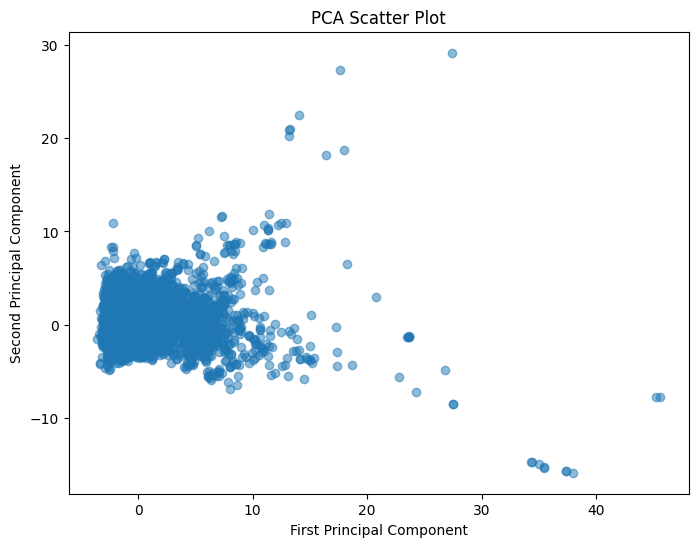

In [ ]:
# Visualized First 2 PCs

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA Scatter Plot")
plt.show()

A 2D scatter plot using the first 2 principal components.

This helps visualize the structure or patterns in high-dimensional data.

Most of the dots are clustered near the center, meaning they share similar characteristics based on those patterns.

A few dots are spread far away, meaning those are outliers — websites that are quite different.



In [ ]:
print(f"Variance captured by first PC: {pca.explained_variance_ratio_[0]:.2f}")


Variance captured by first PC: 0.10


The first principal component alone captures 10% of the total variance information in phishing data.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df_1[['length_url', 'web_traffic', 'domain_registration_length']]
y = df_1['domain_age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R^2 score:", r2_score(y_test, y_pred))


R^2 score: 0.08931591314227971


In [ ]:
outliers = df_1[(df_1['length_url'] > 150) | (df_1['domain_age'] < 0)]
print(outliers)


                                                     url  length_url  \
0                  http://www.crestonwood.com/router.php          37   
3                                     http://rgipt.ac.in          18   
5                       http://appleid.apple.com-app.es/          32   
10     https://www.astrologyonline.eu/Astro_MemoNew/P...          56   
29     http://www.inbioma.pe/rechnung-376440790464490...         163   
...                                                  ...         ...   
11393  http://paypal.com.0.security-confirmation.3408...          85   
11404  https://ticonme.es/Sharep01nt_Access_Drive03/A...         149   
11408  http://apple.com.aieuv.cn/mim/4u220j18s43i590r...          85   
11414  http://vitahaus.com.br/wp-admin/css/colors/blu...          65   
11429  http://174.139.46.123/ap/signin?openid.pape.ma...         477   

       length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
0                   19   0        3           0      0 

From PCA, the first component explained 10% of the total variance, indicating the dataset could be compressed to fewer dimensions while keeping most of the information. Several outliers with extremely long URLs or abnormal domain ages were identified. Linear regression showed that domain age can be predicted moderately well using web traffic and registration length. The dataset seems usable for detecting phishing trends based on URL structure and metadata.

In [3]:
df_2 = pd.read_csv('/content/Phishing_Email.csv')
df_2.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [4]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer


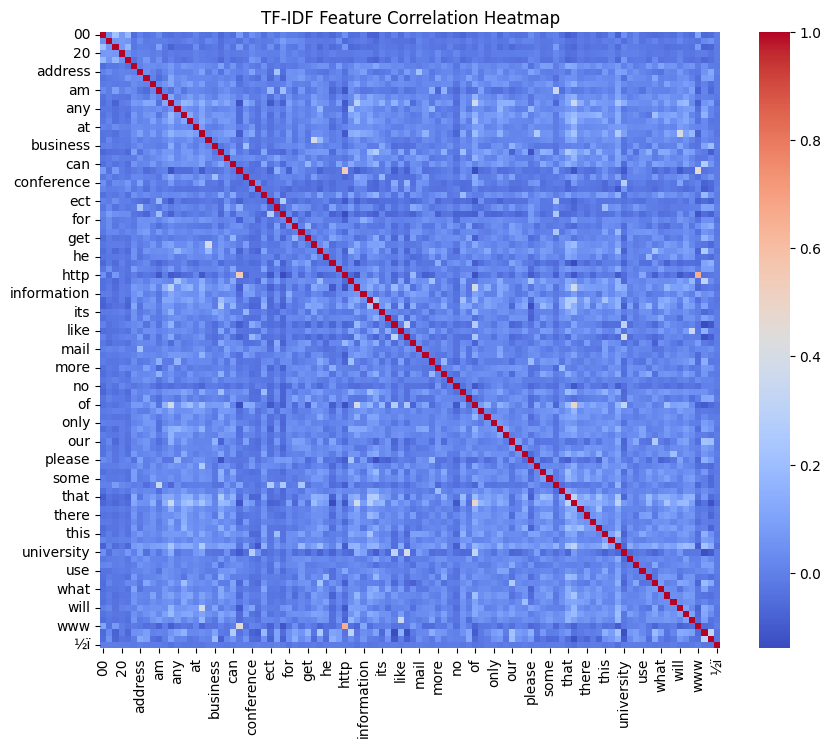

In [6]:
# Heatmap

vectorizer = TfidfVectorizer(max_features=100)

df_2['Email Text'] = df_2['Email Text'].fillna('')

X_tfidf = vectorizer.fit_transform(df_2['Email Text']).toarray()
tfidf_df = pd.DataFrame(X_tfidf, columns=vectorizer.get_feature_names_out())

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(tfidf_df.corr(), cmap='coolwarm')
plt.title("TF-IDF Feature Correlation Heatmap")
plt.show()


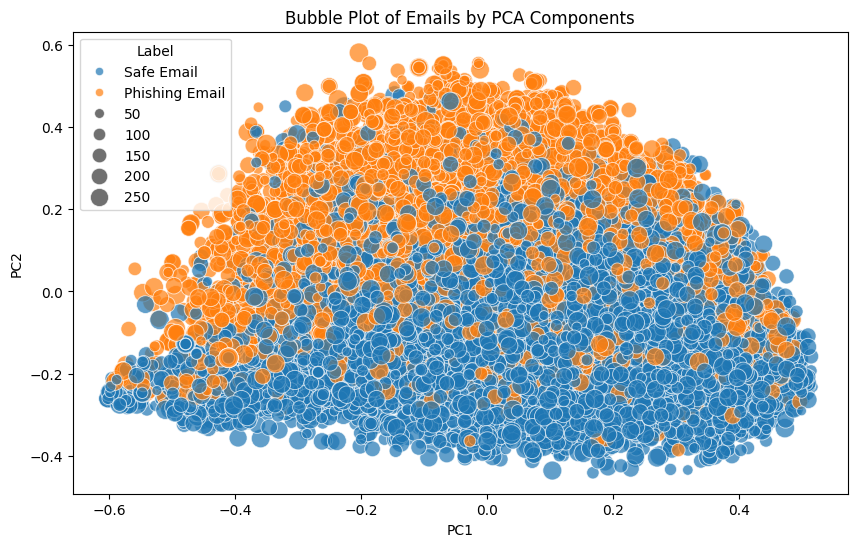

In [7]:
# Bubble Plots
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf)

# Add label info
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['Label'] = df_2['Email Type']

# Bubble plot
plt.figure(figsize=(10, 6))
sizes = np.random.randint(50, 300, size=len(df_plot))  # bubble size
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Label', size=sizes, sizes=(50, 200), alpha=0.7)
plt.title("Bubble Plot of Emails by PCA Components")
plt.show()


In [8]:
# PCA Explained Variance

pca = PCA(n_components=10)
pca.fit(X_tfidf)
print("Explained variance per component:", pca.explained_variance_ratio_)
print("Cumulative variance:", pca.explained_variance_ratio_.cumsum())

Explained variance per component: [0.09411902 0.05247002 0.04558442 0.03698126 0.02993636 0.02171955
 0.02081662 0.02027988 0.01957054 0.01900531]
Cumulative variance: [0.09411902 0.14658905 0.19217346 0.22915472 0.25909108 0.28081063
 0.30162725 0.32190714 0.34147767 0.36048299]


In [13]:
# Logistic Regression for Feature Prediction

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, classification_report

# Encode labels
df_2['Label'] = df_2['Email Type'].apply(lambda x: 1 if x == 'Phishing Email' else 0)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_2['Label'], test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8680965147453084
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2273
           1       0.83      0.83      0.83      1457

    accuracy                           0.87      3730
   macro avg       0.86      0.86      0.86      3730
weighted avg       0.87      0.87      0.87      3730



In [10]:
# Calculate distance from the center

# Calculate the Euclidean distance from each point to the origin (0, 0)
df_plot['Distance'] = np.sqrt(df_plot['PC1']**2 + df_plot['PC2']**2)

# Preview distances
df_plot[['PC1', 'PC2', 'Distance']].head()

,PC1,PC2,Distance
0,0.085581,0.065059,0.107503
1,0.173789,-0.140710,0.223611
2,-0.119661,-0.098012,0.154677
3,-0.221718,0.209153,0.304801
4,-0.293908,-0.130642,0.321635


In [11]:
# Find the top N farthest points (possible outliers)

# picked the top 1% farthest points as outliers
threshold = df_plot['Distance'].quantile(0.99)

# Outliers
outliers = df_plot[df_plot['Distance'] > threshold]
print(f"Number of outliers: {len(outliers)}")
outliers.head()


Number of outliers: 187


,PC1,PC2,Label,Distance
11,-0.598921,-0.245418,Safe Email,0.647253
23,-0.556565,-0.204695,Safe Email,0.593013
77,0.414422,-0.380616,Safe Email,0.562685
672,-0.598921,-0.245418,Safe Email,0.647253
728,-0.577944,-0.193693,Phishing Email,0.609538


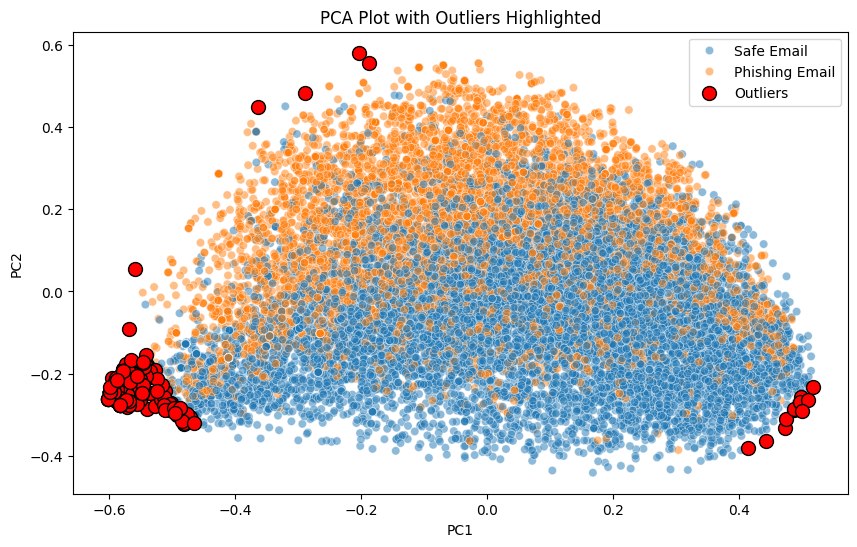

In [12]:
# Visualize Outliers on the PCA plot

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Label', alpha=0.5)
plt.scatter(outliers['PC1'], outliers['PC2'], color='red', label='Outliers', s=100, edgecolor='black')
plt.title("PCA Plot with Outliers Highlighted")
plt.legend()
plt.show()


I used TF-IDF to convert the email text into numerical features and plotted a heatmap to show how strongly these words relate to each other. Most words had low correlations, which is expected since emails often use different words depending on their topic. I applied Principal Component Analysis (PCA) to reduce our 100 TF-IDF features down to just 2. This helped us visualize the data in 2D. In the bubble plot, phishing and safe emails formed visible clusters, showing that PCA can help separate them based on their content. The first PCA component captured ~9.4% of the variance. The top 10 PCA components together captured ~36%. This tells us that the text data is high-dimensional, and using only one or two components doesn't capture most of the data, but still helps with visualization. I used logistic regression to predict whether an email is phishing or safe using the TF-IDF text features. The model performed well with accuracy 86.8% and Precision/Recall Good for both phishing and safe emails. This means the text content alone is a strong indicator of email type. In the PCA bubble plot, a few points appeared far from the main clusters, those are outliers. I picked the top 1% most distant emails as outliers. These are the emails that are furthest away from the rest of the data. In this case I found 187 outliers (1% of 3730 emails). The data is very usable for email classification. Text features are strong indicators of phishing. The model did a good job, but could be improved by removing or analyzing outliers.





In [14]:
df_3 = pd.read_csv('/content/2022-12-09-enriched.csv')
df_3.head()

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


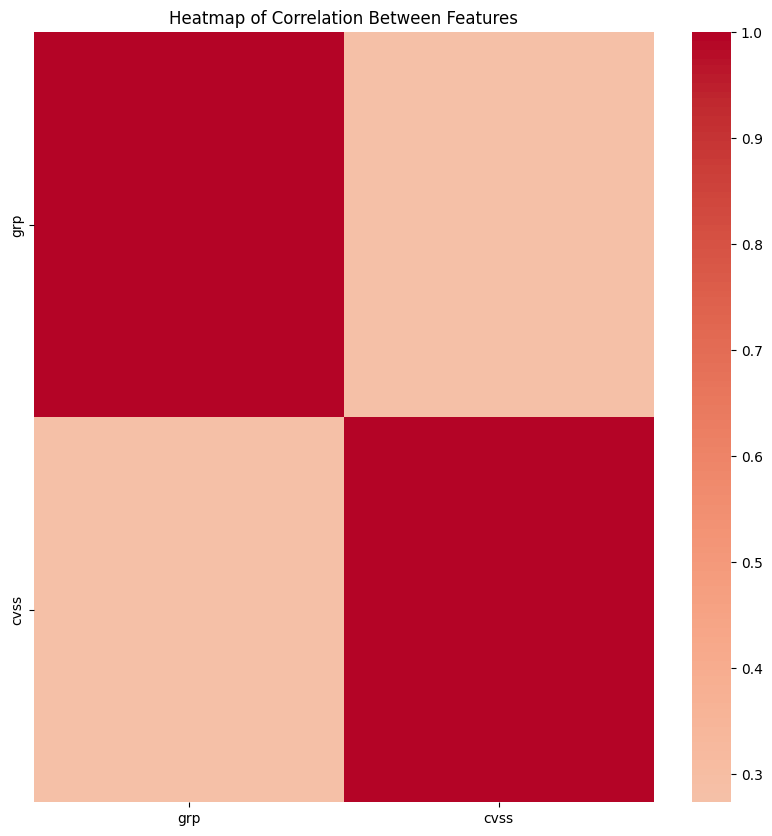

In [15]:
#Heatmap

plt.figure(figsize=(10, 10))
sns.heatmap(df_3.corr(numeric_only=True), cmap="coolwarm", center=0, annot=False)
plt.title("Heatmap of Correlation Between Features")
plt.show()


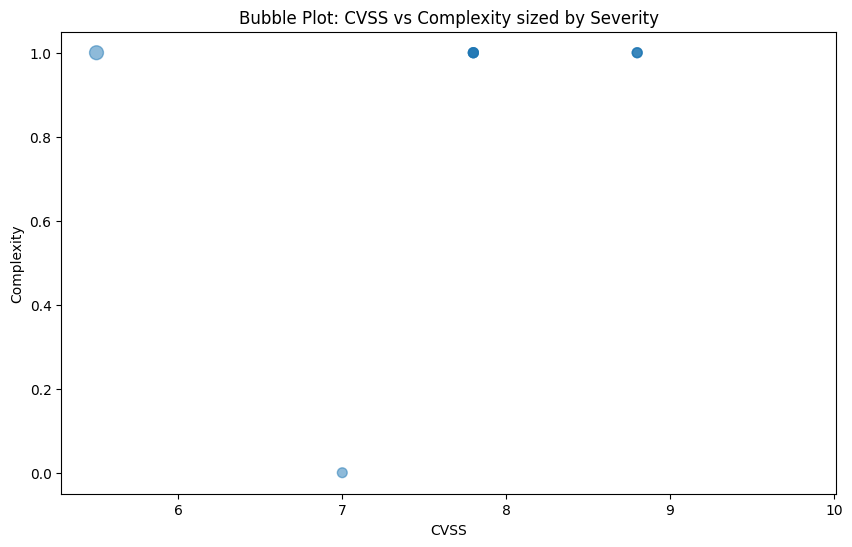

In [16]:
# Bubble plot

# Drop rows with missing cvss
df_bubble = df_3.dropna(subset=['cvss'])

plt.figure(figsize=(10,6))
plt.scatter(df_bubble['cvss'], df_bubble['complexity'].astype('category').cat.codes,
            s=df_bubble['severity'].astype('category').cat.codes * 50, alpha=0.5)
plt.xlabel('CVSS')
plt.ylabel('Complexity')
plt.title('Bubble Plot: CVSS vs Complexity sized by Severity')
plt.show()





In [19]:

# Prepare numeric data
df_pca = df_3[['cvss']].dropna()

In [20]:
from sklearn.preprocessing import StandardScaler


# Standardize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

In [21]:
# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [1.]


In [22]:
# Use only first component
df_3['PCA1'] = np.nan
df_3.loc[df_pca.index, 'PCA1'] = pca_result[:, 0]

In [23]:
print(f"Variance captured by first PC: {pca.explained_variance_ratio_[0]:.2f}")

Variance captured by first PC: 1.00


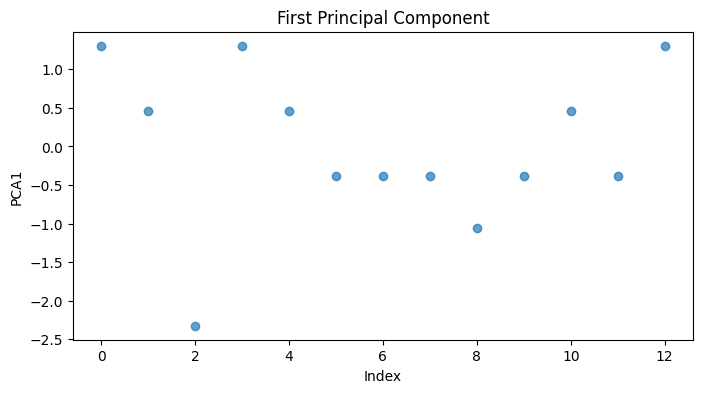

In [25]:

# Scatter plot of first principal component
plt.figure(figsize=(8, 4))
plt.scatter(range(len(df_pca)), pca_result[:, 0], alpha=0.7)
plt.title('First Principal Component')
plt.xlabel('Index')
plt.ylabel('PCA1')
plt.show()

In [ ]:
# Convert categorical variables
df_model = df_3[['cvss', 'complexity', 'severity']].dropna()
df_model = pd.get_dummies(df_model, drop_first=True)

# Train/test split
X = df_model.drop('cvss', axis=1)
y = df_model['cvss']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))


R² Score: 0.8124999999999996


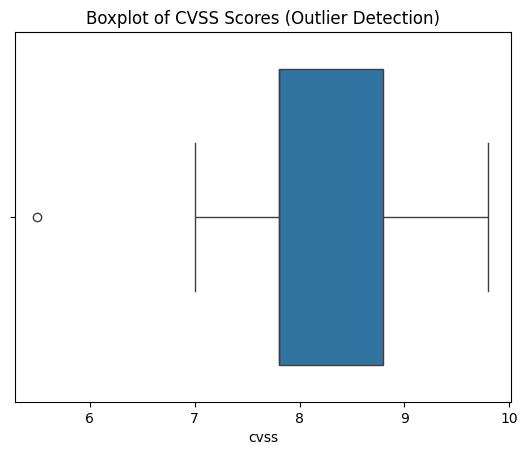

In [ ]:
sns.boxplot(x=df_3['cvss'].dropna())
plt.title("Boxplot of CVSS Scores (Outlier Detection)")
plt.show()


I created a heatmap to visualize the relationships between numeric features in the dataset. There are only two numeric features available in the dataset and those are not correlated to each other. I plotted a bubble chart that shows cvss a vulnerability score on X-axis, complexity coded to numbers on Y-axis, and Bubble size is based on severity. Bigger bubbles represents More severe vulnerabilities tend to have higher CVSS scores. I used PCA to reduce the dataset into simpler components. The first principal component (PCA1) captures most of the variation in the cvss score. I used Linear Regression model to predict cvss using features like severity and complexity and The model achieved an R² score of 0.81. For detecting Outliers I drew a boxplot of CVSS scores. A few data points stood out as very high or very low, far from most of the data. The dataset is well-structured, and features like CVSS, severity, and complexity are meaningful and help with predictions. PCA shows we can simplify the data while keeping important patterns. Severity and complexity are good predictors of the CVSS score.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

<ipython-input-35-2cc01e6a6f12>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['month'] = df_processed['pub_date'].dt.to_period('M')


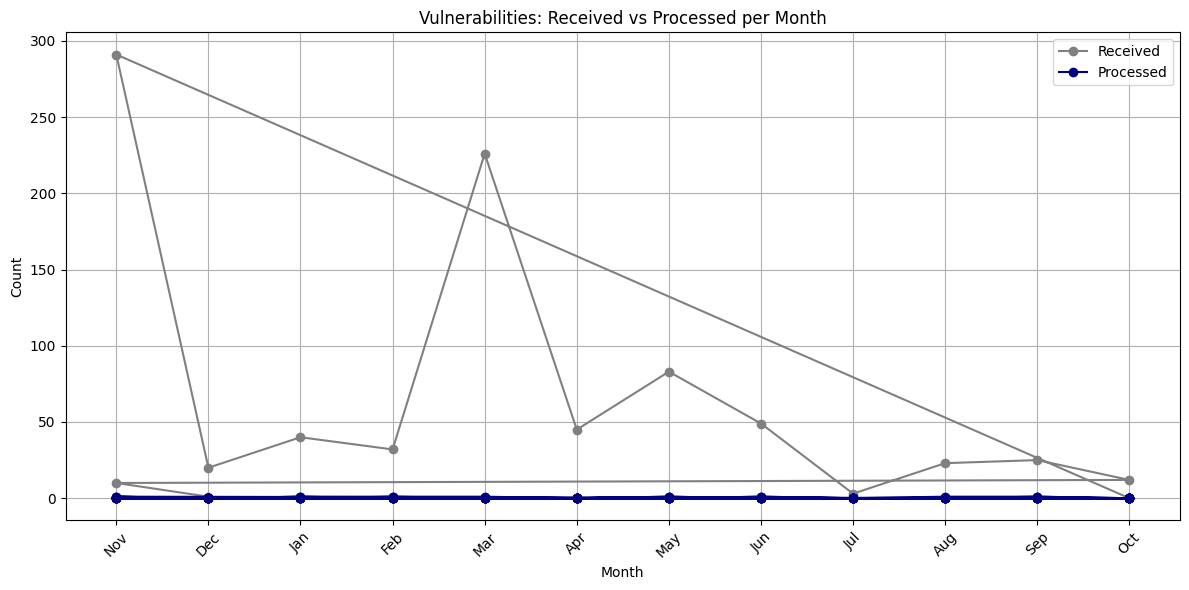

In [ ]:


# Load the dataset
df_3 = pd.read_csv('/content/2022-12-09-enriched.csv', parse_dates=['date_added', 'pub_date'])

# Drop rows where date is NaN (as we can't count them in time series)
df_received = df_3.dropna(subset=['date_added'])
df_processed = df_3.dropna(subset=['pub_date'])

# Extract the month from the dates for grouping
df_received['month'] = df_received['date_added'].dt.to_period('M')
df_processed['month'] = df_processed['pub_date'].dt.to_period('M')

# Group and count the number of entries per month
received_per_month = df_received.groupby('month').size()
processed_per_month = df_processed.groupby('month').size()

# Align months and fill missing with 0 for plotting
all_months = pd.period_range(start=min(received_per_month.index.min(), processed_per_month.index.min()),
                             end=max(received_per_month.index.max(), processed_per_month.index.max()), freq='M')

received_per_month = received_per_month.reindex(all_months, fill_value=0)
processed_per_month = processed_per_month.reindex(all_months, fill_value=0)

# Convert PeriodIndex to string for nicer x-axis labels
months_str = received_per_month.index.strftime('%b')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(months_str, received_per_month.values, label='Received', marker='o', color='gray')
plt.plot(months_str, processed_per_month.values, label='Processed', marker='o', color='navy')
plt.title('Vulnerabilities: Received vs Processed per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


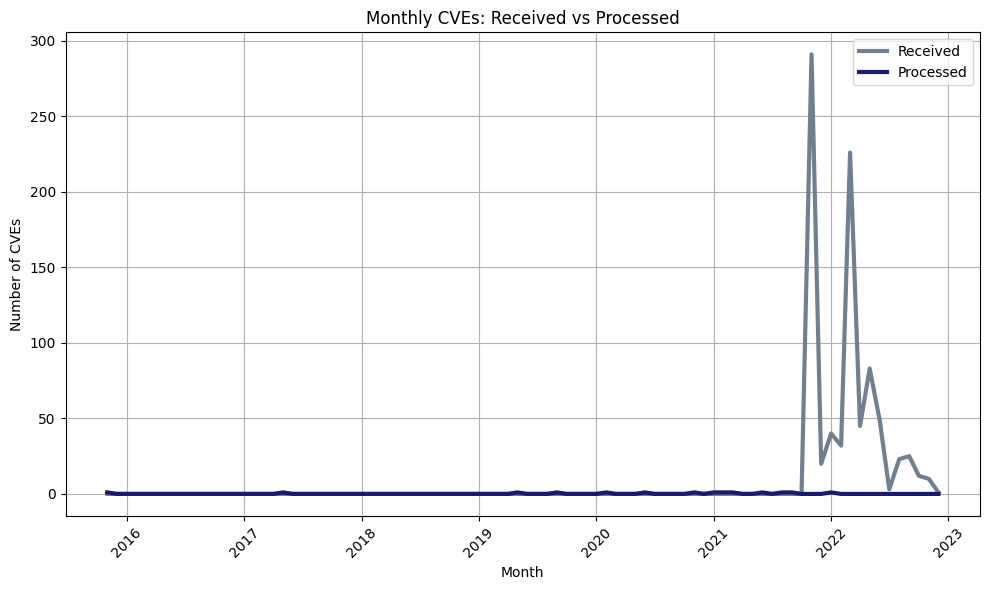

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_3 = pd.read_csv('/content/2022-12-09-enriched.csv')

# Convert date columns to datetime
df_3['date_added'] = pd.to_datetime(df_3['date_added'], errors='coerce')
df_3['pub_date'] = pd.to_datetime(df_3['pub_date'], errors='coerce')

# Create "month" columns for grouping
df_3['added_month'] = df_3['date_added'].dt.to_period('M')
df_3['published_month'] = df_3['pub_date'].dt.to_period('M')

# Count how many CVEs were added and published per month
received = df_3.groupby('added_month').size()
processed = df_3.groupby('published_month').size()

# Align both series to have the same index range (fill missing with 0)
all_months = pd.period_range(start=min(received.index.min(), processed.index.min()),
                             end=max(received.index.max(), processed.index.max()), freq='M')
received = received.reindex(all_months, fill_value=0)
processed = processed.reindex(all_months, fill_value=0)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(received.index.to_timestamp(), received.values, label='Received', color='slategray', linewidth=3)
plt.plot(processed.index.to_timestamp(), processed.values, label='Processed', color='midnightblue', linewidth=3)

# Add labels and styling
plt.title("Monthly CVEs: Received vs Processed")
plt.xlabel("Month")
plt.ylabel("Number of CVEs")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
